


Author : Jashandeep Singh 






## Task : Data Integration 



The provided files for this assignment are in a zip format. Since the input files are given in unzipped form, we manually unzip the files in the directory. From the task instructions, it is given that we have the following files as the provided input: 

    shopingcenters.html,

    real_state.json,

    hospitals.xlsx,

    supermarkets.pdf,

    real_state.xml,

    Vic_suburb_boundary.zip,

    GTFS_Melbourne_Train_Information.zip 
    
    


# Initialising Libraries

- We start the analysis by initialising the basic libraries required to load and understand the files in the courpus

In [1]:
import pandas as pd 

import regex as re


#xml element tree
import xml.etree.ElementTree as ET

#beautiful Soup 
from bs4 import BeautifulSoup


#!pip install pdftables.six
from pdftables import get_tables

## Loading the datasets 

- Now we start loading the datasets into our notebook such that we perform the further EDA to understand and transform the computation for final dataframe schema requirements.

### real_state.json

- we read the json file in the pandas dataframe using the attribute "pd.read_json" 

In [2]:
import json

df_json = pd.read_json(open('real_state.json', "r"))

In [3]:
df_json

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,17405,-37.696368,144.932082,52 View Street,6748000,house,2016,3,1,1
1,18505,-37.674475,144.916761,23 Talgarno Street,4420000,house,2015,4,2,0
2,41241,-37.711162,145.054621,9 Autumn Rise,6687000,house,2010,5,3,2
3,96920,-38.003197,145.274765,5/1 Young Road,2915000,house,2009,3,1,1
4,17144,-37.701735,144.910756,38 Anselm Grove,5460000,house,2012,3,1,2
...,...,...,...,...,...,...,...,...,...,...
1005,62656,-37.835830,145.237429,2 Bayley Close,8100000,house,2016,4,2,2
1006,49641,-37.805142,145.094586,6 Clayton Road,16960000,house,2011,4,3,2
1007,9425,-37.846630,144.722248,25 Barmera Way,3576000,house,2016,4,2,2
1008,63022,-37.834259,145.243896,6 Barnic Road,4509000,house,2011,3,1,1


Observation: 

   - It can be observed that df_json dataframe has 1010 row entries and 10 columns, that are the most of the column requirements by our output dataframe schema. 
   
   - We choose this dataframe as our basis to understand all the other components for integrating the computation as we proceed forward. 

### hospitals.xlsx 

 - We proceed to load the hospitals.xlsx file into notebook by using panads attribute read_excel
 
 - as a precautionary measure, we initialise sys library to find and declare the file system encoding for the respective file such that no data descrepencies occur while reading the data
 
 - As the excel file is read, we remove the redundant column "Unnamed: 0" which is created to signify the sheet name in the excel file. Since the excel file is only a single sheet document, we disregard this column. 

In [4]:
import sys

#using sys to find the default sys enconding for reading the hospitals.xlsx file
df_hospitals = pd.read_excel("hospitals.xlsx", encoding=sys.getfilesystemencoding())

In [5]:
#removing redundant column
del df_hospitals["Unnamed: 0"]

In [561]:
df_hospitals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      199 non-null    object 
 1   lat     199 non-null    float64
 2   lng     199 non-null    float64
 3   name    199 non-null    object 
dtypes: float64(2), object(2)
memory usage: 6.3+ KB


Observation: 

 - It can be seen that there are a total of 199 Hospitals entries with their Locational Attributes (lat and lng) and the names associated with it

### shoppingcenters.html

In [7]:
#pandas read_html returns a list, therefore giving list indice '[0]' for obtaining the dataframe

df_shopping_centers = pd.read_html("shopingcenters.html", encoding=sys.getfilesystemencoding())[0]

In [8]:
#removing redundant columns 
del df_shopping_centers['Unnamed: 0']

In [9]:
df_shopping_centers

,sc_id,lat,lng
0,SC_001,-37.767915,145.041790
1,SC_002,-37.819375,145.171472
2,SC_003,-37.971131,145.089065
3,SC_004,-35.280406,149.132550
4,SC_005,-37.574572,144.920451
...,...,...,...
114,SC_115,-38.014916,145.323404
115,SC_116,43.105259,-76.091619
116,SC_117,-38.005454,145.217573
117,SC_118,-37.486265,144.589067


### supermarkets.pdf

In [10]:
from pdftables import get_tables

pdfFile = 'supermarkets.pdf'
pdfobj = open(pdfFile, 'rb')

tables = get_tables(pdfobj)

In [11]:
!pdf2txt.py -o supermarkets.txt supermarkets.pdf

#pdf text scrapper
print("done")

done


In [12]:
pdfTxtFile = 'supermarkets.txt'
pdf_txt = open(pdfTxtFile, 'r')

super_pdf = []

# loop over all the lines
for line in pdf_txt:
    
    super_pdf.append(line)
    # repr() is a built-in Python fuction that returns a string containing a printable representation of an object.
    print (repr(line))

'id\n'
'\n'
'lat\n'
'\n'
'lng\n'
'\n'
'type\n'
'0 S_001 -37.883978 144.735287 Woolworths\n'
'1 S_002 -41.161591 147.514797 Woolworths\n'
'2 S_003 -37.984078 145.077167 Woolworths\n'
'3 S_004 -37.707023 144.938740 Woolworths\n'
'4 S_005 -37.597670 144.938413 Woolworths\n'
'5 S_006 -38.101859 145.184101 Woolworths\n'
'6 S_007 -37.867486 144.742849 Woolworths\n'
'7 S_008 -37.889410 145.293758 Woolworths\n'
'8 S_009 -37.915287 144.995748 Woolworths\n'
'9 S_010 -37.922149 145.083448 Woolworths\n'
'10 S_011 -37.981563 145.062431 Woolworths\n'
'11 S_012 -36.716114 142.196116 Woolworths\n'
'12 S_013 -37.863263 145.026958 Woolworths\n'
'13 S_014 -38.308993 145.191110 Woolworths\n'
'14 S_015 -37.887683 145.056410 Woolworths\n'
'15 S_016 -37.830824 144.957430 Woolworths\n'
'16 S_017 -37.868476 144.978778 Woolworths\n'
'17 S_018 -37.831419 145.147320 Woolworths\n'
'18 S_019 -38.453047 145.239126 Woolworths\n'
'19 S_020 -37.704694 145.100065 Woolworths\n'
'20 S_021 -35.734027 143.916795 Woolworths\

In [13]:
#converting the list to string 

super_pdf = ''.join(super_pdf)

In [14]:
#using regex to match all the elements and catagorise into lists

regex_id = r"(?=S).+(?= -)"

regex_lat = r"(?=-).+(?= 1)"

regex_lng = r"(?= 11| 13| 14| 15| 16).+(?= )"

regex_type = r"(?=W|C).+(?<=s)"


matches_id = re.finditer(regex_id, super_pdf, re.MULTILINE)
matches_lat = re.finditer(regex_lat, super_pdf, re.MULTILINE)
matches_lng = re.finditer(regex_lng, super_pdf, re.MULTILINE)
matches_type = re.finditer(regex_type, super_pdf, re.MULTILINE)




super_id = []
super_lat = []
super_lng = []
super_type = []


for matchNum, match in enumerate(matches_id, start=1): 
    super_id.append(match.group())
for matchNum, match in enumerate(matches_lat, start=1): 
    super_lat.append(match.group())
for matchNum, match in enumerate(matches_lng, start=1): 
    super_lng.append(match.group())
#removing the space character generated from the regex match 
super_lng = [x.strip(' ') for x in super_lng]    

for matchNum, match in enumerate(matches_type, start=1): 
    super_type.append(match.group())    

In [15]:
#checking the length of all the elements list to rectify errors.

len(super_type)

239

In [16]:
len(super_id)

239

In [17]:
len(super_lat)

239

In [18]:
len(super_lng)

239

In [19]:
#since all the lists have the same number of elements, we create a df 
#converting to Df 

supermarkets_df = pd.DataFrame({'id': super_id, "lat":super_lat, "lng": super_lng, "type": super_type})

In [20]:
supermarkets_df

,id,lat,lng,type
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths
2,S_003,-37.984078,145.077167,Woolworths
3,S_004,-37.707023,144.938740,Woolworths
4,S_005,-37.597670,144.938413,Woolworths
...,...,...,...,...
234,S_235,-37.860188,145.028920,Coles
235,S_236,-37.875984,144.614490,Coles
236,S_237,-37.047330,143.744610,Coles
237,S_238,-38.351648,144.922881,Coles


### real_state.xml


In [21]:
#real_estate.xml file. 

#loading the file a string in memory with defined encoding

#ref: https://stackoverflow.com/questions/29755652/read-xml-as-a-txt-in-python


#further refining of file using regex 

#real_estate_xml = open("real_state.xml", "r", encoding="cp1252")

#real_estate_raw = real_estate_xml.read()

In [22]:
real_state_raw = open("real_state.xml", "r+").read()

In [23]:
#correction for starting b' pattern

sub1 = r"(?<=).+?(?=<?xml)"

sub_1 = r"<?"


#correction for ending root pattern
sub2 = r"(?<=/root>).+?(?=)"

sub_2 = r""



#sub_1
r_state = re.sub(sub1, sub_1, real_state_raw, 0, re.MULTILINE)


#sub_2

r_state = re.sub(sub2, sub_2, r_state, 0, re.MULTILINE)

output = open("real_state.xml", "w")
output.write(r_state)
output.close

<function TextIOWrapper.close()>

In [24]:
#from the xml file characters b'' were removed as it voilated the xml structure

btree = BeautifulSoup(open("real_state.xml"),"lxml-xml") 

In [25]:
btree.prettify()

'<?xml version="1.0" encoding="utf-8"?>\n<root>\n <property_id type="dict">\n  <n82301 type="int">\n   82836\n  </n82301>\n  <n22242 type="int">\n   22777\n  </n22242>\n  <n30318 type="int">\n   30853\n  </n30318>\n  <n67194 type="int">\n   67729\n  </n67194>\n  <n4601 type="int">\n   4622\n  </n4601>\n  <n11881 type="int">\n   12396\n  </n11881>\n  <n59698 type="int">\n   60233\n  </n59698>\n  <n73278 type="int">\n   73813\n  </n73278>\n  <n41662 type="int">\n   42197\n  </n41662>\n  <n30217 type="int">\n   30752\n  </n30217>\n  <n74818 type="int">\n   75353\n  </n74818>\n  <n4049 type="int">\n   4070\n  </n4049>\n  <n89783 type="int">\n   90318\n  </n89783>\n  <n78756 type="int">\n   79291\n  </n78756>\n  <n50152 type="int">\n   50687\n  </n50152>\n  <n85055 type="int">\n   85590\n  </n85055>\n  <n61439 type="int">\n   61974\n  </n61439>\n  <n63164 type="int">\n   63699\n  </n63164>\n  <n93223 type="int">\n   93758\n  </n93223>\n  <n68600 type="int">\n   69135\n  </n68600>\n  <n67742

In [26]:
#we use the delemitere "><" to split because then the xml data is refined per line containing the data we want 
#it also makes our regex match more efficient 



#property_id
featuretags = btree.find_all("property_id")

for feature in featuretags:
    property_id = str(feature).split("><")
    #print(str(feature).split("\n"))

    
#lat
featuretags = btree.find_all("lat")

for feature in featuretags:
    lat = str(feature).split("><")
    #print(str(feature).split("\n"))

    
#lng
featuretags = btree.find_all("lng")

for feature in featuretags:
    lng = str(feature).split("><")
    #print(str(feature).split("\n"))
    

    
#addr_street
featuretags = btree.find_all("addr_street")

for feature in featuretags:
    addr_street = str(feature).split("><")
    #print(str(feature).split("\n"))
    
    
#price
featuretags = btree.find_all("price")

for feature in featuretags:
    price = str(feature).split("><")
    #print(str(feature).split("\n"))


#property_type
featuretags = btree.find_all("property_type")

for feature in featuretags:
    property_type = str(feature).split("><")
    #print(str(feature).split("\n"))

    
    
#year
featuretags = btree.find_all("year")

for feature in featuretags:
    year = str(feature).split("><")
    #print(str(feature).split("\n"))
          
        
#bedrooms
featuretags = btree.find_all("bedrooms")

for feature in featuretags:
    bedrooms = str(feature).split("><")
    #print(str(feature).split("\n"))
          

        
#bathrooms
featuretags = btree.find_all("bathrooms")

for feature in featuretags:
    bathrooms = str(feature).split("><")
    #print(str(feature).split("\n"))
          

#parking_space
featuretags = btree.find_all("parking_space")

for feature in featuretags:
    parking_space = str(feature).split("><")
    #print(str(feature).split("\n"))
    

In [27]:
#creating the regex to fetch all the element data 

regex_property_id = r"(?<=\"int\">).+(?=</n)"

regex_lat = r"(?<=\"float\">).+(?=</n)"

regex_lng = r"(?<=\"float\">).+(?=</n)"

regex_addr_street = r"(?<=\"str\">).+(?=</n)"

regex_price = r"(?<=\"int\">).+(?=</n)"

regex_property_type = r"(?<=\"str\">).+(?=</n)"

regex_year = r"(?<=\"int\">).+(?=</n)"

regex_bedrooms = r"(?<=\"int\">).+(?=</n)"

regex_bathrooms = r"(?<=\"int\">).+(?=</n)"

regex_parking_space = r"(?<=\"int\">).+(?=</n)"


In [28]:
# defining a function to return an element list from re match 

def element_list(regex, file):
    a  = []
    #since the first element in the list is the declaration of the element name and type, we call the index from 2nd element 
    #for ex: property_id type="dict" is n = 0 
    n = 1
    
    #setting the range with one less element 
    while n in range(len(file) - 1):
        #print(n)
        a.append(''.join(re.findall(regex, file[n])))
        n = n + 1 
    
    return a

In [29]:
#calling the function for all the elements to be filtered and converted to list 

property_id = element_list(regex_property_id, property_id)

lat = element_list(regex_lat, lat)

lng = element_list(regex_lng, lng)

addr_street = element_list(regex_addr_street, addr_street)

price = element_list(regex_price, price)

property_type = element_list(regex_property_type, property_type)

year = element_list(regex_year, year)

bedrooms = element_list(regex_bedrooms, bedrooms)

bathrooms = element_list(regex_bathrooms, bathrooms)

parking_space = element_list(regex_parking_space, parking_space)


In [30]:
#creating the df 

real_state_df_xml = pd.DataFrame({"property_id" : property_id, "lat" : lat, "lng": lng,"addr_street": addr_street, "price" : price, "property_type" : property_type,"year" : year, "bedrooms": bedrooms, "bathrooms":bathrooms, "parking_space": parking_space})

In [31]:
real_state_df_xml.tail()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
999,24359,-37.70191574,144.9611969,36 Margaret St,3410000,house,2008,3,1,0
1000,20870,-37.76045227,144.9589539,246 Albion Street,6552000,house,2008,4,1,1
1001,48408,-37.7977727,145.02743619999998,4 Linnaker Place,4500000,house,2012,4,3,2
1002,6128,-37.788174,144.843532,12A High St,6162000,house,2014,3,3,0
1003,72833,-37.864259000000004,145.297416,106 Daffodil Road,4400000,house,2012,3,2,2


## Merging real_state.xml and real_state.json Dataframes

In [193]:
real_state_df = pd.concat([df_json, real_state_df_xml])

In [194]:
#reseting the index
real_state_df = real_state_df.reset_index()

#dropping the redundant index column 
del real_state_df["index"]

In [195]:
real_state_df

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,17405,-37.6964,144.932,52 View Street,6748000,house,2016,3,1,1
1,18505,-37.6745,144.917,23 Talgarno Street,4420000,house,2015,4,2,0
2,41241,-37.7112,145.055,9 Autumn Rise,6687000,house,2010,5,3,2
3,96920,-38.0032,145.275,5/1 Young Road,2915000,house,2009,3,1,1
4,17144,-37.7017,144.911,38 Anselm Grove,5460000,house,2012,3,1,2
...,...,...,...,...,...,...,...,...,...,...
2009,24359,-37.70191574,144.9611969,36 Margaret St,3410000,house,2008,3,1,0
2010,20870,-37.76045227,144.9589539,246 Albion Street,6552000,house,2008,4,1,1
2011,48408,-37.7977727,145.02743619999998,4 Linnaker Place,4500000,house,2012,4,3,2
2012,6128,-37.788174,144.843532,12A High St,6162000,house,2014,3,3,0


In [196]:

#rectifying and removing non unique property_id and their subsequential data

#only 2007 unique property_id are in the df where there are 2014 row entries
len(real_state_df.property_id.unique())

2007

In [197]:
#showing the duplicate values based on no unique property_id 

# it can be seen the all row entries are the same for duplicated property_id 

#ref: https://stackoverflow.com/questions/50594377/list-rows-which-column-value-is-not-unique-in-dataframe


print(real_state_df[real_state_df.duplicated(subset=["property_id"], keep= False)])

    property_id      lat      lng                     addr_street     price  \
37        15129 -37.7374  144.912               23 Magdala Avenue  16050000   
200       29203 -37.7704  144.996               10 Turnbull Grove  12180000   
221        8635 -37.7549  144.751                  7 Rogers Close   8411000   
244       87116 -37.9095  144.988              8 Grosvenor Street  16560000   
321       29203 -37.7704  144.996               10 Turnbull Grove  12180000   
327       87116 -37.9095  144.988              8 Grosvenor Street  16560000   
452       26039 -37.5837   144.91             23 Grevillea Street   5120000   
526       50272 -37.7756  145.086                  5 Barak Street  16065000   
546       50272 -37.7756  145.086                  5 Barak Street  16065000   
550       79449 -37.9508  145.157  Moishe Circuit 57 Sandown Road  15795000   
748       26039 -37.5837   144.91             23 Grevillea Street   5120000   
905       15129 -37.7374  144.912               23 M

In [198]:
#it can be seen there are 14 rows, that means 7 entries that are duplicated

#hence we'll remove the duplicated entries

#from observing the above data, we create the list of duplicated row indexes. 

duplicate_index = [905, 321, 952, 327, 748, 546, 989]

real_state_df = real_state_df.drop(duplicate_index).reset_index()

del real_state_df["index"]

In [199]:
real_state_df

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,17405,-37.6964,144.932,52 View Street,6748000,house,2016,3,1,1
1,18505,-37.6745,144.917,23 Talgarno Street,4420000,house,2015,4,2,0
2,41241,-37.7112,145.055,9 Autumn Rise,6687000,house,2010,5,3,2
3,96920,-38.0032,145.275,5/1 Young Road,2915000,house,2009,3,1,1
4,17144,-37.7017,144.911,38 Anselm Grove,5460000,house,2012,3,1,2
...,...,...,...,...,...,...,...,...,...,...
2002,24359,-37.70191574,144.9611969,36 Margaret St,3410000,house,2008,3,1,0
2003,20870,-37.76045227,144.9589539,246 Albion Street,6552000,house,2008,4,1,1
2004,48408,-37.7977727,145.02743619999998,4 Linnaker Place,4500000,house,2012,4,3,2
2005,6128,-37.788174,144.843532,12A High St,6162000,house,2014,3,3,0


In [200]:
#unique check 
print(real_state_df[real_state_df.duplicated(subset=["property_id"], keep= False)])

Empty DataFrame
Columns: [property_id, lat, lng, addr_street, price, property_type, year, bedrooms, bathrooms, parking_space]
Index: []


### Making a Property Lat and Long and an Df index list 

In [299]:
#list of index values for real_estate_df 

real_state_df_index = list(real_state_df.index)




# creating a list for property latitude and longitude 
n = 0

p_lat = []
p_lng = []

if n != len(real_state_df_index):
    
    
    #all the appending is in the same sequence as the index of the rows 
    #rounding off the lat and lng values to 4 decimal places for 
    
    for lat in real_state_df["lat"]:
        
        lat = round(float(lat), 5)
        p_lat.append(lat)
        
        
    for lng in real_state_df["lng"]:
        
        lat = round(float(lng), 5)
        p_lng.append(lng)
        
    n = n+1

### vic_suburb_boundary.zip


The vic_suburb_boundary.zip file contains 4 files which are: 

    - VIC_LOCALITY_POLYGON_shp.shp
    - VIC_LOCALITY_POLYGON_shp.dbf
    - VIC_LOCALITY_POLYGON_shp.prj
    - VIC_LOCALITY_POLYGON_shp.shx

Using the referece from Kiara Wang on EdStem, we manually extract the zip file such that there is a folder of the same name as of the zip file in the directory. We load the folder and create a GeoPandas shape file with suburb name and polygon data

In [220]:
import geopandas

In [222]:
shape_file = geopandas.read_file("vic_suburb_boundary")

In [228]:
shape_file

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7,geometry
0,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0..."
1,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.66877 -37.39571, 148.66876 -37.3..."
2,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"POLYGON ((142.92288 -37.97886, 142.90449 -37.9..."
3,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,"POLYGON ((147.82336 -37.66001, 147.82313 -37.6..."
4,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"POLYGON ((141.27978 -35.99859, 141.27989 -35.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,10667,2017-06-02,None,VIC1635,2017-08-09,None,MELBOURNE AIRPORT,None,None,G,None,2,"POLYGON ((144.86382 -37.67087, 144.86405 -37.6..."
2969,10666,2017-06-02,None,VIC381,2017-08-09,None,BULLA,None,None,G,None,2,"POLYGON ((144.80217 -37.66167, 144.80243 -37.6..."
2970,10688,2017-06-02,None,VIC2308,2017-08-09,None,SOMERS,None,None,G,None,2,"POLYGON ((145.19211 -38.39105, 145.19392 -38.3..."
2971,10687,2017-06-02,None,VIC1187,2017-08-09,None,HMAS CERBERUS,None,None,G,None,2,"POLYGON ((145.21831 -38.38722, 145.21863 -38.3..."


In [234]:
print("the unique entries in column LC_PLY_PID are:" ,len(shape_file.LC_PLY_PID.unique()))
print("the unique entries in column LOC_PID are:" ,len(shape_file.LOC_PID.unique()))
#discovering that all the unique identifiers for the location and polygon data are same as the number of elements

the unique entries in column LC_PLY_PID are: 2973
the unique entries in column LOC_PID are: 2973


In [243]:
#curating a polygon dict with the suburb name 
polygon_df = shape_file.copy()

polygon_df = polygon_df[["VIC_LOCA_2", "geometry"]]

polygon_dict = polygon_df.set_index("VIC_LOCA_2").T.to_dict("list")

In [252]:
polygon_dict


{'UNDERBOOL': [<shapely.geometry.polygon.Polygon at 0x7ff1506d5310>],
 'NURRAN': [<shapely.geometry.polygon.Polygon at 0x7ff1503a8580>],
 'WOORNDOO': [<shapely.geometry.polygon.Polygon at 0x7ff1504abf40>],
 'DEPTFORD': [<shapely.geometry.polygon.Polygon at 0x7ff1504ab850>],
 'YANAC': [<shapely.geometry.polygon.Polygon at 0x7ff1503d65b0>],
 'MINIMAY': [<shapely.geometry.polygon.Polygon at 0x7ff14f443be0>],
 'GLEN FORBES': [<shapely.geometry.polygon.Polygon at 0x7ff14f443c40>],
 'ADAMS ESTATE': [<shapely.geometry.polygon.Polygon at 0x7ff14f443eb0>],
 'DIMBOOLA': [<shapely.geometry.polygon.Polygon at 0x7ff14f50ad00>],
 'CANNUM': [<shapely.geometry.polygon.Polygon at 0x7ff14f443fd0>],
 'WALLUP': [<shapely.geometry.polygon.Polygon at 0x7ff1506a21c0>],
 'MURRA WARRA': [<shapely.geometry.polygon.Polygon at 0x7ff1506a2ac0>],
 'KALKEE': [<shapely.geometry.polygon.Polygon at 0x7ff1506a2fd0>],
 'WAIL': [<shapely.geometry.polygon.Polygon at 0x7ff1506d7220>],
 'PIMPINIO': [<shapely.geometry.polygon

In [254]:
b = shape_file.geometry[1]

In [256]:
b.contains(a)


False

In [308]:
from shapely.geometry import Point

n = 0 

suburb_list = []

while n != len(real_state_df_index):
    
    #suburb = {}
    
    #shopping_center_id and distance_to_sc

    for key, value in polygon_dict.items():
        
        #print(key)
        
        #for the polygon, long, lat variable series is inputed 
        #using the contain attribute of the Point function within shapely library 
        x = (polygon_dict[key][0].contains(Point(float(p_lng[n]), float(p_lat[n]))))

        
        if x is True:
            
            
            suburb_list.append(key)
            print("For the index: ", n, "The Suburb is:", key)
            
    
    n = n+1 

real_state_df["suburb"] = suburb_list
    


For the index:  0 The Suburb is: GLENROY
For the index:  1 The Suburb is: BROADMEADOWS
For the index:  2 The Suburb is: BUNDOORA
For the index:  3 The Suburb is: HALLAM
For the index:  4 The Suburb is: GLENROY
For the index:  5 The Suburb is: SYDENHAM
For the index:  6 The Suburb is: CANTERBURY
For the index:  7 The Suburb is: ABBOTSFORD
For the index:  8 The Suburb is: MCKINNON
For the index:  9 The Suburb is: FOOTSCRAY
For the index:  10 The Suburb is: BUNDOORA
For the index:  11 The Suburb is: YARRAVILLE
For the index:  12 The Suburb is: SYDENHAM
For the index:  13 The Suburb is: KEILOR
For the index:  14 The Suburb is: CRAIGIEBURN
For the index:  15 The Suburb is: FAWKNER
For the index:  16 The Suburb is: BRUNSWICK
For the index:  17 The Suburb is: KEW
For the index:  18 The Suburb is: SUNSHINE
For the index:  19 The Suburb is: BORONIA
For the index:  20 The Suburb is: CROYDON NORTH
For the index:  21 The Suburb is: BUNDOORA
For the index:  22 The Suburb is: LILYDALE
For the index:

In [306]:
len(suburb_list)

2007

In [309]:
real_state_df

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station,suburb
0,17405,-37.6964,144.932,52 View Street,6748000,house,2016,3,1,1,SC_059,4.249,hospital_104,5.187,S_209,1.287,20031,1.436,GLENROY
1,18505,-37.6745,144.917,23 Talgarno Street,4420000,house,2015,4,2,0,SC_072,2.684,hospital_104,2.666,S_153,0.589,20030,0.987,BROADMEADOWS
2,41241,-37.7112,145.055,9 Autumn Rise,6687000,house,2010,5,3,2,SC_047,3.725,hospital_037,1.072,S_155,1.387,19983,2.090,BUNDOORA
3,96920,-38.0032,145.275,5/1 Young Road,2915000,house,2009,3,1,1,SC_077,2.331,hospital_069,4.014,S_212,0.817,19885,1.677,HALLAM
4,17144,-37.7017,144.911,38 Anselm Grove,5460000,house,2012,3,1,2,SC_010,2.506,hospital_184,4.543,S_209,1.259,20032,0.649,GLENROY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,24359,-37.70191574,144.9611969,36 Margaret St,3410000,house,2008,3,1,0,SC_030,3.531,hospital_139,3.684,S_161,1.403,19961,0.247,FAWKNER
2003,20870,-37.76045227,144.9589539,246 Albion Street,6552000,house,2008,4,1,1,SC_030,3.217,hospital_011,0.655,S_074,1.045,19967,0.176,BRUNSWICK
2004,48408,-37.7977727,145.02743619999998,4 Linnaker Place,4500000,house,2012,4,3,2,SC_083,2.626,hospital_029,0.977,S_039,0.941,19931,2.183,KEW
2005,6128,-37.788174,144.843532,12A High St,6162000,house,2014,3,3,0,SC_102,1.091,hospital_174,1.516,S_080,1.172,20021,0.938,SUNSHINE


### GTFS_Melbournme_Train_Information.zip

The zipped files contains a subfolder named "1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)" which contains the files: 
    
    - agency.txt 
    - calender.txt
    - calender_dates.txt
    - routes.txt
    - shapes.txt
    - stops.txt
    - stop_times.txt
    - trips.txt
    

In [111]:
GTFS_Melbourne_Train_Information = zipfile.ZipFile("GTFS_Melbourne_Train_Information.zip")

In [115]:
#showing the contents of the zipped file 
GTFS_Melbourne_Train_Information.namelist()

['1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/',
 '1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/',
 '1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/agency.txt',
 '1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/calendar.txt',
 '1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/calendar_dates.txt',
 '1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/routes.txt',
 '1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/shapes.txt',
 '1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/stops.txt',
 '1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/stop_times.txt',
 '1. GTFS - Melbourne Train Inform

Loading the files in memory from the zipped file and forming a Pandas Dataframe using read_csv attribute


In [146]:
agency_txt = GTFS_Melbourne_Train_Information.open('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/agency.txt', "r")

agency_df = pd.read_csv(agency_txt)

In [147]:
calender_txt = GTFS_Melbourne_Train_Information.open('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/calendar.txt', "r")

calender_df = pd.read_csv(calender_txt)


In [148]:
calender_dates_txt = GTFS_Melbourne_Train_Information.open('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/calendar_dates.txt', "r")

calender_dates_df = pd.read_csv(calender_dates_txt)

In [149]:
routes_txt = GTFS_Melbourne_Train_Information.open( '1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/routes.txt',"r")

routes_df =  pd.read_csv(routes_txt)


In [150]:
shapes_txt = GTFS_Melbourne_Train_Information.open('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/shapes.txt', "r")

shapes_df = pd.read_csv(shapes_txt)


In [151]:
stops_txt = GTFS_Melbourne_Train_Information.open('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/stops.txt' , "r")

stops_df = pd.read_csv(stops_txt)

In [152]:
stop_times_txt = GTFS_Melbourne_Train_Information.open('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/stop_times.txt', "r")

stop_times_df =  pd.read_csv(stop_times_txt)

In [153]:
trips_txt = GTFS_Melbourne_Train_Information.open('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/trips.txt' , "r")

trips_df =  pd.read_csv(trips_txt)

In [179]:
#unique train stations in the dataset 
len(stops_df.stop_name.unique())

218

It is observed that the number of entries in the dataset are all unique by name for the train station entries. 

## Haversine Function for distance computation

In [95]:
# defining the haversine function for finding the nearest distance 

import math

def hav_distance(origin, destination):
    lat1 , lon1 = origin
    
    lat2, lon2 = destination 
    
    radius = 6378 # radius of earth in kms
    
    
    dlat = math.radians(lat2 - lat1)
    
    dlon = math.radians(lon2 - lon1)
    
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1))* math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    
    d = radius * c
    
    return d


### Calculating the closest distances for the attributes 

- shopping_center

- hospitals

- supermarkets

- train_station


[-37.6964,
 -37.6745,
 -37.7112,
 -38.0032,
 -37.7017,
 -37.7045,
 -37.8207,
 -37.8019,
 -37.9114,
 -37.7967,
 -37.7113,
 -37.8144,
 -37.6984,
 -37.7225,
 -37.6024,
 -37.7019,
 -37.7605,
 -37.7978,
 -37.7882,
 -37.8643,
 -37.7802,
 -37.7051,
 -37.7591,
 -37.8787,
 -37.8219,
 -37.9244,
 -37.8086,
 -37.5773,
 -37.8523,
 -37.8566,
 -37.8226,
 -37.6917,
 -37.7074,
 -37.8658,
 -37.7238,
 -37.9696,
 -37.8862,
 -37.7374,
 -37.8547,
 -37.7949,
 -37.7813,
 -37.9834,
 -37.8154,
 -37.7312,
 -37.912,
 -37.9408,
 -37.7432,
 -37.952,
 -37.6844,
 -37.9459,
 -37.7502,
 -37.7089,
 -37.8342,
 -37.695,
 -37.7242,
 -37.5922,
 -37.6829,
 -37.8158,
 -37.6841,
 -37.9894,
 -37.8516,
 -37.765,
 -37.791,
 -37.6756,
 -37.8134,
 -37.797,
 -37.9282,
 -37.9999,
 -37.7087,
 -37.7267,
 -37.781,
 -37.7604,
 -37.7836,
 -37.7285,
 -37.8149,
 -37.8497,
 -37.5807,
 -37.8882,
 -37.8451,
 -37.7147,
 -37.7015,
 -37.7499,
 -37.8297,
 -37.94,
 -37.7179,
 -37.8868,
 -37.7946,
 -37.9605,
 -37.8839,
 -37.9572,
 -37.9738,
 -37.791

#### Closest id and distance for Shopping Center, Supermarket and Hospital 

In [203]:
#creating a locational data list for shopping_center 

shopping_center_loc_dict = df_shopping_centers.set_index("sc_id").T.to_dict("list")

In [204]:
shopping_center_loc_dict
   

{'SC_001': [-37.767915, 145.04179],
 'SC_002': [-37.819375, 145.171472],
 'SC_003': [-37.971131, 145.08906499999998],
 'SC_004': [-35.280406, 149.13255],
 'SC_005': [-37.574571999999996, 144.920451],
 'SC_006': [-38.355942999999996, 144.90732],
 'SC_007': [-37.81268, 144.962905],
 'SC_008': [-37.811846, 144.96983400000002],
 'SC_009': [-37.76565, 145.091914],
 'SC_010': [-37.714110999999995, 144.886988],
 'SC_011': [-37.782381, 144.91614099999998],
 'SC_012': [-37.872345, 144.61225100000001],
 'SC_013': [43.090863, -80.893658],
 'SC_014': [-37.814546, 144.962925],
 'SC_015': [-37.868688, 144.98071399999998],
 'SC_016': [-37.592875, 144.913832],
 'SC_017': [-37.755763, 145.068525],
 'SC_018': [31.039833, -97.363978],
 'SC_019': [30.009392, -97.878327],
 'SC_020': [-37.818606, 145.121965],
 'SC_021': [-33.935873, 151.237777],
 'SC_022': [-37.799085, 145.28307900000001],
 'SC_023': [-37.876197999999995, 145.04286399999998],
 'SC_024': [-37.845219, 144.99468000000002],
 'SC_025': [-37.8397

In [205]:
#creating a locational data list for hospital
hospital_loc = df_hospitals.copy()

del hospital_loc["name"]

hospital_loc_dict = hospital_loc.set_index("id").T.to_dict("list")

In [206]:
hospital_loc_dict

{'hospital_001': [-37.99062199999999, 145.072836],
 'hospital_002': [-37.8554685, 145.2681831],
 'hospital_003': [-37.79223, 144.889128],
 'hospital_004': [-37.756042, 145.061896],
 'hospital_005': [-37.760623, 144.815624],
 'hospital_006': [-36.359274, 145.410832],
 'hospital_007': [-37.774573, 144.923973],
 'hospital_008': [-37.849467, 145.226801],
 'hospital_009': [-37.869801, 145.003096],
 'hospital_010': [-37.8104543, 145.1940997],
 'hospital_011': [-37.754592, 144.958277],
 'hospital_012': [-37.854654, 144.998759],
 'hospital_013': [-37.896305, 145.013206],
 'hospital_014': [-37.8143093, 145.1185688],
 'hospital_015': [-36.138197, 144.748819],
 'hospital_016': [-36.993135, 144.064656],
 'hospital_017': [-38.15985, 145.165998],
 'hospital_018': [-37.966621, 145.194007],
 'hospital_019': [-36.362528, 145.408591],
 'hospital_020': [-36.14057, 141.987191],
 'hospital_021': [-36.378489, 141.237173],
 'hospital_022': [-37.816144, 144.965102],
 'hospital_023': [-36.741816, 141.941948],


In [207]:
#creating a locational data list for supermarket

supermarket_loc = supermarkets_df.copy()

del supermarket_loc["type"]

supermarket_loc_dict = supermarket_loc.set_index("id").T.to_dict("list")

In [208]:
#converting the dict values to float 

supermarket_loc = {}
for i in supermarket_loc_dict:
    supermarket_loc[i]=[]
    for j in supermarket_loc_dict[i]:
        supermarket_loc[i].append(float(j))

In [209]:
supermarket_loc

{'S_001': [-37.883978, 144.735287],
 'S_002': [-41.161591, 147.514797],
 'S_003': [-37.984078, 145.077167],
 'S_004': [-37.707023, 144.93874],
 'S_005': [-37.59767, 144.938413],
 'S_006': [-38.101859, 145.184101],
 'S_007': [-37.867486, 144.742849],
 'S_008': [-37.88941, 145.293758],
 'S_009': [-37.915287, 144.995748],
 'S_010': [-37.922149, 145.083448],
 'S_011': [-37.981563, 145.062431],
 'S_012': [-36.716114, 142.196116],
 'S_013': [-37.863263, 145.026958],
 'S_014': [-38.308993, 145.19111],
 'S_015': [-37.887683, 145.05641],
 'S_016': [-37.830824, 144.95743],
 'S_017': [-37.868476, 144.978778],
 'S_018': [-37.831419, 145.14732],
 'S_019': [-38.453047, 145.239126],
 'S_020': [-37.704694, 145.100065],
 'S_021': [-35.734027, 143.916795],
 'S_022': [-37.54049, 143.830192],
 'S_023': [-37.959461, 145.055819],
 'S_024': [-37.861681, 145.284582],
 'S_025': [-37.767757, 144.921397],
 'S_026': [-37.887115, 145.08443],
 'S_027': [-37.898439, 145.23185],
 'S_028': [-38.360016, 144.891086],
 '

#### Train_station_id and Distance_to_train_station

we use the stops_df that we generated from the GTFS_Melbournme_Train_Information.zip file earlier 


it can be further concretly prooven that for the stop_id mentioned in the stops_df, can be used to identify train_stations_id as stated by PTV webiste article stating "Each station has attributes that describe stop ID, station name, latitude/longitude, ticket zone and routes using the stop.". Reference: https://www.ptv.vic.gov.au/footer/data-and-reporting/datasets/

Also using the Google transit API documentation: 

for stops.txt file: 

"Identifies a stop, station, or station entrance.The term "station entrance" refers to both station entrances and station exits. Stops, stations or station entrances are collectively referred to as locations."

Hence, we use the stop_id as Train_station_id for our computation

Reference: https://developers.google.com/transit/gtfs/reference#stopstxt

In [210]:
# we curate a dictionary for each unique stop_id and its significant long and lat values

#making a copy of df 

train_station_df = stops_df.copy()

del train_station_df["stop_name"]

del train_station_df["stop_short_name"]


train_station_dict = train_station_df.set_index("stop_id").T.to_dict("list")

In [211]:
train_station_dict


{15351: [-37.579090970578704, 144.727318781329],
 15353: [-37.627016514935704, 144.719922441113],
 19827: [-38.3742345364937, 145.221837462187],
 19828: [-38.3661233827862, 145.204043321601],
 19829: [-38.35403333658439, 145.189602487712],
 19830: [-38.3373903202406, 145.178026527511],
 19831: [-38.3056585273722, 145.185979882012],
 19832: [-38.2598150046916, 145.186400708984],
 19833: [-38.2253419593114, 145.17624491889998],
 19834: [-38.1940430573051, 145.16052608761498],
 19835: [-37.8593084165858, 145.058224898221],
 19836: [-38.1520339975222, 145.139533963382],
 19837: [-37.8689568446092, 145.06295082624501],
 19838: [-37.8769300156728, 145.0693930023],
 19839: [-37.874402220049795, 145.090662027436],
 19840: [-37.873603393318795, 145.112090156436],
 19841: [-37.811981307380705, 144.955653760429],
 19842: [-37.809938766738604, 144.962593535096],
 19843: [-37.8110540555305, 144.972910916416],
 19844: [-37.909102097471205, 145.35529128285802],
 19845: [-37.9081184864021, 145.3429945

In [213]:
#iterating a loop for computing and adding the closest shopping center and it's id 

n = 0

#shopping_center column list 
list_sc_id = []

list_distance_sc = []




#hospital column list 

list_hospital_id = []

list_distance_hospital = []



#supermarket column list 

list_supermarket_id = []

list_distance_supermarket = []


#train_station column list 

list_train_station_id = []

list_train_station_distance = []



while n != len(real_state_df_index):
    
    distance_all = {}
    
    #shopping_center_id and distance_to_sc

    for key, value in shopping_center_loc_dict.items():
        
        distance_all[key] = round(hav_distance((float(p_lat[n]), float(p_lng[n])),shopping_center_loc_dict[key]),3)
    
    list_sc_id.append(min(distance_all,key=lambda x:distance_all[x]))
    #using the same naming of the column as provided in the instruction table
    list_distance_sc.append(min(distance_all.values())) 

    #print(distance_all)
    
    distance_all.clear()
    
    
    #hospital 
    
    for key, value in hospital_loc_dict.items():
        
        distance_all[key] = round(hav_distance((float(p_lat[n]), float(p_lng[n])),hospital_loc_dict[key]),3)
    
    list_hospital_id.append(min(distance_all,key=lambda x:distance_all[x]))
    #using the same naming of the column as provided in the instruction table
    list_distance_hospital.append(min(distance_all.values())) 

    #print(distance_all)
    
    distance_all.clear()
    
    
    
    #supermarket
    
    for key, value in supermarket_loc.items():
        
        distance_all[key] = round(hav_distance((float(p_lat[n]), float(p_lng[n])),supermarket_loc[key]),3)
    
    list_supermarket_id.append(min(distance_all,key=lambda x:distance_all[x]))
    #using the same naming of the column as provided in the instruction table
    list_distance_supermarket.append(min(distance_all.values())) 

    #print(distance_all)
    
    distance_all.clear()
    
    
    #train_station
    
    for key, value in train_station_dict.items():
        
        distance_all[key] = round(hav_distance((float(p_lat[n]), float(p_lng[n])), train_station_dict[key]),3)
    
    list_train_station_id.append(min(distance_all,key=lambda x:distance_all[x]))
    #using the same naming of the column as provided in the instruction table
    list_train_station_distance.append(min(distance_all.values())) 

    #print(distance_all)
    
    distance_all.clear()
    
    
    
    
    n = n+1 

#shopping center
real_state_df["Shopping_center_id"] = list_sc_id
real_state_df["Distance_to_sc"] = list_distance_sc

#hospital 

real_state_df["Hospital_id"] = list_hospital_id
real_state_df["Distance_to_hospital"] = list_distance_hospital


#supermarket 
real_state_df["Supermarket_id"] = list_supermarket_id
real_state_df["Distance_to_supermaket"] = list_distance_supermarket


#train_station

real_state_df["Train_station_id"] = list_train_station_id
real_state_df["Distance_to_train_station"] = list_train_station_distance
        

In [107]:
#checking for any null values 


real_state_df.isnull().values.any()


False

In [310]:
real_state_df


,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station,suburb
0,17405,-37.6964,144.932,52 View Street,6748000,house,2016,3,1,1,SC_059,4.249,hospital_104,5.187,S_209,1.287,20031,1.436,GLENROY
1,18505,-37.6745,144.917,23 Talgarno Street,4420000,house,2015,4,2,0,SC_072,2.684,hospital_104,2.666,S_153,0.589,20030,0.987,BROADMEADOWS
2,41241,-37.7112,145.055,9 Autumn Rise,6687000,house,2010,5,3,2,SC_047,3.725,hospital_037,1.072,S_155,1.387,19983,2.090,BUNDOORA
3,96920,-38.0032,145.275,5/1 Young Road,2915000,house,2009,3,1,1,SC_077,2.331,hospital_069,4.014,S_212,0.817,19885,1.677,HALLAM
4,17144,-37.7017,144.911,38 Anselm Grove,5460000,house,2012,3,1,2,SC_010,2.506,hospital_184,4.543,S_209,1.259,20032,0.649,GLENROY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,24359,-37.70191574,144.9611969,36 Margaret St,3410000,house,2008,3,1,0,SC_030,3.531,hospital_139,3.684,S_161,1.403,19961,0.247,FAWKNER
2003,20870,-37.76045227,144.9589539,246 Albion Street,6552000,house,2008,4,1,1,SC_030,3.217,hospital_011,0.655,S_074,1.045,19967,0.176,BRUNSWICK
2004,48408,-37.7977727,145.02743619999998,4 Linnaker Place,4500000,house,2012,4,3,2,SC_083,2.626,hospital_029,0.977,S_039,0.941,19931,2.183,KEW
2005,6128,-37.788174,144.843532,12A High St,6162000,house,2014,3,3,0,SC_102,1.091,hospital_174,1.516,S_080,1.172,20021,0.938,SUNSHINE


#### Finding the over average price


In [350]:
#creating the list of unique suburbs in the df 

#suburb name list 
s_name_list = real_state_df["suburb"].unique()

#curating a dictionary of the suburb name and the average price of the property in that suburb. 
s_avg_dict = {}

for name in s_name_list:
    #filtering the dataframe according to the suburb name and finding the mean price in the suburb
    s_avg_dict[name] = round(pd.to_numeric(real_state_df[real_state_df.suburb == name]["price"]).mean(),3)
    

## Calculations not Correct !!!!!!!!

In [380]:
#calculating and iterating over the properties to find the Over_ave_price column values 

n = 0 

over_ave_list = []

while n != len(real_state_df_index):
    

    for key, value in s_avg_dict.items():
        
        if key == real_state_df.at[n, "suburb"]: 
            #print("for index:", n, "the Suburb is:", key, "and the average price is: ", value)
            #print("the property price is:",(real_state_df.at[n, "price"]), "\n")
            
            #if the average price is less than the property_price, over_avg_price is TRUE
            #else it is false
            if value < int(real_state_df.at[n, "price"]):
                
                over_ave_list.append(True)
                #print(True, "\n")
            else:
                
                over_ave_list.append(False)
                #print(False, "\n")
            
    
    n = n+1 

real_state_df["Over_ave_price"] = over_ave_list


for index: 0 the Suburb is: GLENROY and the average price is:  6563727.273
the property price is: 6748000 

True 

for index: 1 the Suburb is: BROADMEADOWS and the average price is:  4382312.5
the property price is: 4420000 

True 

for index: 2 the Suburb is: BUNDOORA and the average price is:  7277673.077
the property price is: 6687000 

False 

for index: 3 the Suburb is: HALLAM and the average price is:  4309466.667
the property price is: 2915000 

False 

for index: 4 the Suburb is: GLENROY and the average price is:  6563727.273
the property price is: 5460000 

False 

for index: 5 the Suburb is: SYDENHAM and the average price is:  5101200.0
the property price is: 6135000 

True 

for index: 6 the Suburb is: CANTERBURY and the average price is:  16321600.0
the property price is: 11662000 

False 

for index: 7 the Suburb is: ABBOTSFORD and the average price is:  11219916.667
the property price is: 7680000 

False 

for index: 8 the Suburb is: MCKINNON and the average price is:  13

In [381]:
real_state_df

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station,suburb,Over_ave_price
0,17405,-37.6964,144.932,52 View Street,6748000,house,2016,3,1,1,SC_059,4.249,hospital_104,5.187,S_209,1.287,20031,1.436,GLENROY,True
1,18505,-37.6745,144.917,23 Talgarno Street,4420000,house,2015,4,2,0,SC_072,2.684,hospital_104,2.666,S_153,0.589,20030,0.987,BROADMEADOWS,True
2,41241,-37.7112,145.055,9 Autumn Rise,6687000,house,2010,5,3,2,SC_047,3.725,hospital_037,1.072,S_155,1.387,19983,2.090,BUNDOORA,False
3,96920,-38.0032,145.275,5/1 Young Road,2915000,house,2009,3,1,1,SC_077,2.331,hospital_069,4.014,S_212,0.817,19885,1.677,HALLAM,False
4,17144,-37.7017,144.911,38 Anselm Grove,5460000,house,2012,3,1,2,SC_010,2.506,hospital_184,4.543,S_209,1.259,20032,0.649,GLENROY,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,24359,-37.70191574,144.9611969,36 Margaret St,3410000,house,2008,3,1,0,SC_030,3.531,hospital_139,3.684,S_161,1.403,19961,0.247,FAWKNER,False
2003,20870,-37.76045227,144.9589539,246 Albion Street,6552000,house,2008,4,1,1,SC_030,3.217,hospital_011,0.655,S_074,1.045,19967,0.176,BRUNSWICK,False
2004,48408,-37.7977727,145.02743619999998,4 Linnaker Place,4500000,house,2012,4,3,2,SC_083,2.626,hospital_029,0.977,S_039,0.941,19931,2.183,KEW,False
2005,6128,-37.788174,144.843532,12A High St,6162000,house,2014,3,3,0,SC_102,1.091,hospital_174,1.516,S_080,1.172,20021,0.938,SUNSHINE,False


### travel_min_to_CBD

we start by analysing all the df files we computed from GTFS_Melbourne_Train_Information file.

We reference the documentation from Google Transit API to understand the quantifiers and qualifiers of the elements in our dataset. Reference: https://developers.google.com/transit/gtfs/reference#tripstxt


According to Documentation:

1. for trips_df: 

    trip_heagsign: Text that appears on signage identifying the trip's destination to riders

    direction_id: Indicates the direction of travel for a trip. This field is not used in routing; it provides a way to separate trips by direction when publishing time tables. Valid options are:


        - 0 - Travel in one direction (e.g. outbound travel).
        - 1 - Travel in the opposite direction (e.g. inbound travel).

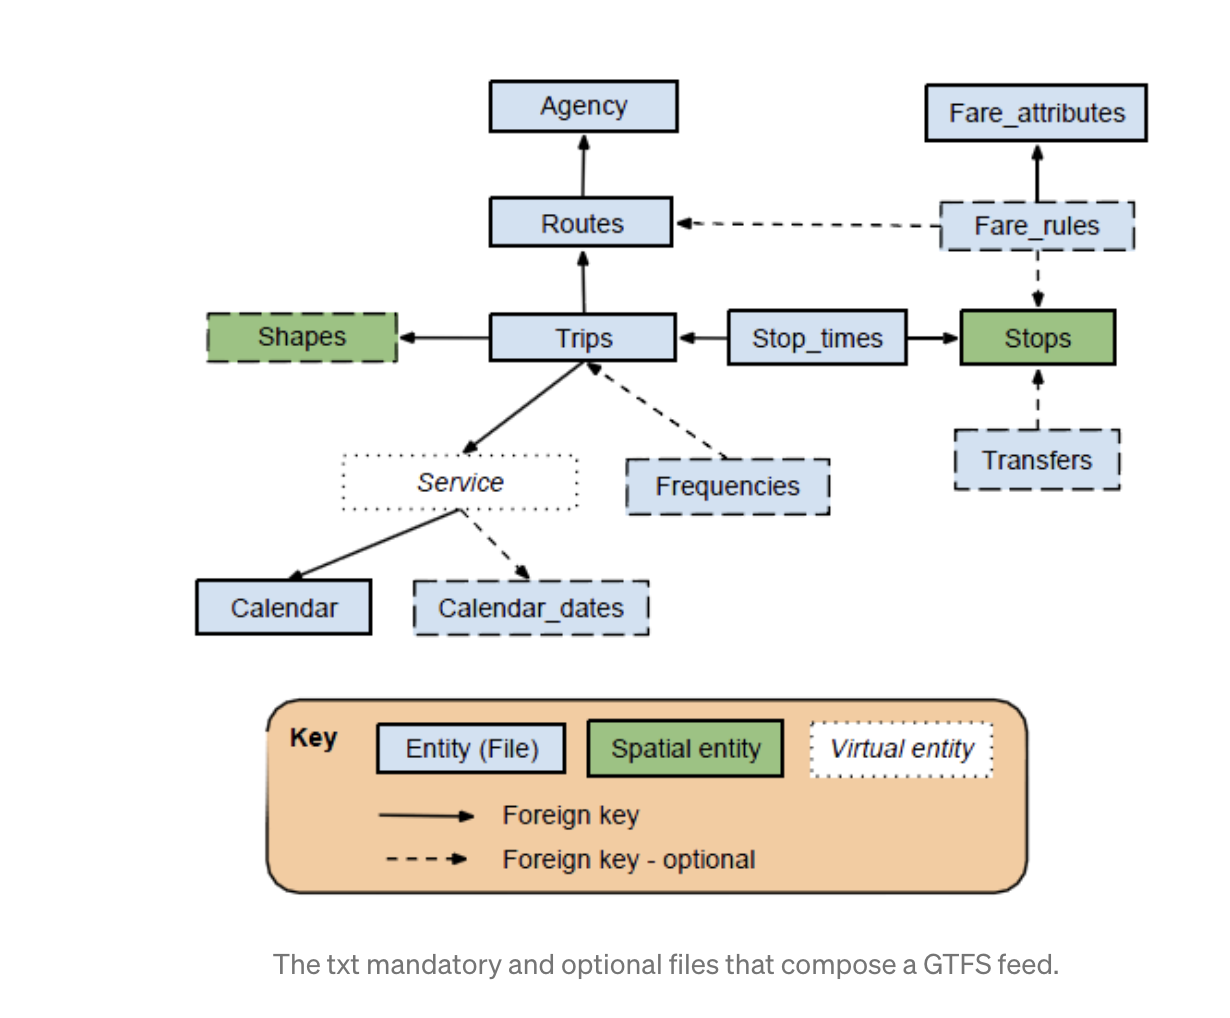


Reference: https://medium.com/analytics-vidhya/the-hitchhikers-guide-to-gtfs-with-python-e9790090952a


Using the above diagram we can understan the data co-relation better 

In [391]:
# we  choose to filter the df by "trip_headsign" to refine for Fliders Street (CBD)
# we choose to filter trips that are inbound, that is traveling in one direction
CBD_trip_df = trips_df[trips_df.trip_headsign == "City (Flinders Street)"][trips_df.direction_id == 0]

<ipython-input-391-eaf9b3240b06>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CBD_trip_df = trips_df[trips_df.trip_headsign == "City (Flinders Street)"][trips_df.direction_id == 0]


In [392]:
CBD_trip_df

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
...,...,...,...,...,...,...
23762,2-WMN-F-mjp-1,UJ_2,17072250.UJ.2-WMN-F-mjp-1.3.H,2-WMN-F-mjp-1.3.H,City (Flinders Street),0
23763,2-WMN-F-mjp-1,UJ_2,17072254.UJ.2-WMN-F-mjp-1.3.H,2-WMN-F-mjp-1.3.H,City (Flinders Street),0
23764,2-WMN-F-mjp-1,UJ_2,17072258.UJ.2-WMN-F-mjp-1.3.H,2-WMN-F-mjp-1.3.H,City (Flinders Street),0
23765,2-WMN-F-mjp-1,UJ_2,17072262.UJ.2-WMN-F-mjp-1.3.H,2-WMN-F-mjp-1.3.H,City (Flinders Street),0


Now we refine the dataframe for the services active on Monday-Friday, that is excluding the Weekends

In [415]:
weekday_calender_df = calender_df[calender_df.saturday != 1][calender_df.sunday != 1]



<ipython-input-415-ae90752f8e82>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weekday_calender_df = calender_df[calender_df.saturday != 1][calender_df.sunday != 1]


In [419]:
weekday_calender_df

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
2,T6,0,0,0,0,1,0,0,20151009,20151011
3,T5,1,1,1,1,0,0,0,20151012,20151015
6,T6_1,0,0,0,0,1,0,0,20151016,20151018
7,T5_1,1,1,1,1,0,0,0,20151019,20151022
8,T0,1,1,1,1,1,0,0,20151023,20151122
11,T0+a6,0,0,0,0,1,0,0,20151023,20151122
12,T0+a5,1,1,1,1,0,0,0,20151023,20151122
13,T5+tg,1,1,0,0,0,0,0,20151012,20151015
14,T5+ph,0,0,1,1,0,0,0,20151012,20151015
15,T5+tg_1,1,1,0,0,0,0,0,20151019,20151022


In [423]:

#creating a list of service IDs that are only for Weekdays
service_list = weekday_calender_df.service_id.to_list()

In [430]:
#refining the CBD_trip_df with services only for weekdays

CBD_trip_df = CBD_trip_df[CBD_trip_df.service_id.isin(service_list)]

In [431]:
CBD_trip_df

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
...,...,...,...,...,...,...
18814,2-WMN-D-mjp-1,T6_1,17196679.T6.2-WMN-D-mjp-1.6.H,2-WMN-D-mjp-1.6.H,City (Flinders Street),0
18815,2-WMN-D-mjp-1,T6_1,17196675.T6.2-WMN-D-mjp-1.6.H,2-WMN-D-mjp-1.6.H,City (Flinders Street),0
18816,2-WMN-D-mjp-1,T6_1,17196683.T6.2-WMN-D-mjp-1.6.H,2-WMN-D-mjp-1.6.H,City (Flinders Street),0
18817,2-WMN-D-mjp-1,T6_1,17196687.T6.2-WMN-D-mjp-1.6.H,2-WMN-D-mjp-1.6.H,City (Flinders Street),0


In [409]:
#determining the stop_id for "Fliders Street Railway Station"
#stop_id is same as Train_station_id
stops_df[stops_df.stop_name == "Flinders Street Railway Station"]["stop_id"]

29    19854
Name: stop_id, dtype: int64

In [410]:
#using the stop_id to find arrival departure for the "Fliders Street Railway Station"
#using it as a reference for all the trains arriving to Flinders Street Railway Station. 
CBD_stop_times_df = stop_times_df[stop_times_df.stop_id == 19854]

In [411]:
CBD_stop_times_df

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
919,17183020.T6.2-ALM-B-mjp-1.2.H,06:13:00,06:13:00,19854,18,NaN,0,0,19128.315379
936,17183058.T6.2-ALM-B-mjp-1.2.H,09:43:00,09:43:00,19854,18,NaN,0,0,19128.315379
953,17183060.T6.2-ALM-B-mjp-1.2.H,09:58:00,09:58:00,19854,18,NaN,0,0,19128.315379
970,17183024.T6.2-ALM-B-mjp-1.2.H,06:42:00,06:42:00,19854,18,NaN,0,0,19128.315379
987,17183028.T6.2-ALM-B-mjp-1.2.H,06:58:00,06:58:00,19854,18,NaN,0,0,19128.315379
...,...,...,...,...,...,...,...,...,...
389642,17071211.T0.2-WMN-F-mjp-1.5.R,17:25:00,17:25:00,19854,1,NaN,0,0,0.000000
389653,17071213.T0.2-WMN-F-mjp-1.5.R,17:47:00,17:47:00,19854,1,NaN,0,0,0.000000
389664,17071215.T0.2-WMN-F-mjp-1.5.R,18:10:00,18:10:00,19854,1,NaN,0,0,0.000000
390201,17199141.T2.2-ain-mjp-1.2.H,18:00:00,18:00:00,19854,1,NaN,0,0,0.000000


Now our plan of action is to determine the stops taken by the train to reach Flidners Street Station or wether if the train is a direct commute, then we can compute the time of travel by comparing arrival and departure times of train respectively 

In [434]:
to_CBD_df = pd.merge(CBD_trip_df, stop_times_df, on=["trip_id"])

In [442]:
to_CBD_df

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,05:01:00,05:01:00,19847,1,NaN,0,0,0.000000
1,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,05:02:00,05:02:00,19848,2,NaN,0,0,723.017818
2,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,05:04:00,05:04:00,19849,3,NaN,0,0,1951.735072
3,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,05:06:00,05:06:00,19850,4,NaN,0,0,2899.073349
4,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,05:08:00,05:08:00,19851,5,NaN,0,0,3927.090952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77672,2-WMN-D-mjp-1,T6_1,17196691.T6.2-WMN-D-mjp-1.6.H,2-WMN-D-mjp-1.6.H,City (Flinders Street),0,09:33:00,09:33:00,19997,7,NaN,0,0,7597.081896
77673,2-WMN-D-mjp-1,T6_1,17196691.T6.2-WMN-D-mjp-1.6.H,2-WMN-D-mjp-1.6.H,City (Flinders Street),0,09:35:00,09:35:00,20025,8,NaN,0,0,8698.558607
77674,2-WMN-D-mjp-1,T6_1,17196691.T6.2-WMN-D-mjp-1.6.H,2-WMN-D-mjp-1.6.H,City (Flinders Street),0,09:40:00,09:40:00,19973,10,NaN,0,0,12421.414533
77675,2-WMN-D-mjp-1,T6_1,17196691.T6.2-WMN-D-mjp-1.6.H,2-WMN-D-mjp-1.6.H,City (Flinders Street),0,09:43:00,09:43:00,22180,11,NaN,0,0,14086.995318


refining the travel departure time between 7 AM and 9 AM

In [460]:
#refining the df to get the flinders street chart 
Flinders_df = to_CBD_df[to_CBD_df.stop_id == 19854]

In [461]:
#ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.between_time.html
#converting the departure time to time format with timedelta


trains_to_CBD = to_CBD_df[pd.to_timedelta(to_CBD_df.departure_time).between("07:00:00", "09:00:00")][to_CBD_df.stop_id != 19854]

<ipython-input-461-5e872567f738>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trains_to_CBD = to_CBD_df[pd.to_timedelta(to_CBD_df.departure_time).between("07:00:00", "09:00:00")][to_CBD_df.stop_id != 19854]


,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station,suburb,Over_ave_price
0,17405,-37.6964,144.932,52 View Street,6748000,house,2016,3,1,1,SC_059,4.249,hospital_104,5.187,S_209,1.287,20031,1.436,GLENROY,True
1,18505,-37.6745,144.917,23 Talgarno Street,4420000,house,2015,4,2,0,SC_072,2.684,hospital_104,2.666,S_153,0.589,20030,0.987,BROADMEADOWS,True
2,41241,-37.7112,145.055,9 Autumn Rise,6687000,house,2010,5,3,2,SC_047,3.725,hospital_037,1.072,S_155,1.387,19983,2.090,BUNDOORA,False
3,96920,-38.0032,145.275,5/1 Young Road,2915000,house,2009,3,1,1,SC_077,2.331,hospital_069,4.014,S_212,0.817,19885,1.677,HALLAM,False
4,17144,-37.7017,144.911,38 Anselm Grove,5460000,house,2012,3,1,2,SC_010,2.506,hospital_184,4.543,S_209,1.259,20032,0.649,GLENROY,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,24359,-37.70191574,144.9611969,36 Margaret St,3410000,house,2008,3,1,0,SC_030,3.531,hospital_139,3.684,S_161,1.403,19961,0.247,FAWKNER,False
2003,20870,-37.76045227,144.9589539,246 Albion Street,6552000,house,2008,4,1,1,SC_030,3.217,hospital_011,0.655,S_074,1.045,19967,0.176,BRUNSWICK,False
2004,48408,-37.7977727,145.02743619999998,4 Linnaker Place,4500000,house,2012,4,3,2,SC_083,2.626,hospital_029,0.977,S_039,0.941,19931,2.183,KEW,False
2005,6128,-37.788174,144.843532,12A High St,6162000,house,2014,3,3,0,SC_102,1.091,hospital_174,1.516,S_080,1.172,20021,0.938,SUNSHINE,False


In [548]:
import datetime
n = 0 

time_list = []

while n != len(real_state_df_index):
    #unique trip Ids for the strating train station
    y = trains_to_CBD[trains_to_CBD.stop_id == real_state_df.Train_station_id[n]]["trip_id"].unique()
    
    minute_list = []
    
    for tripid in y :
        
        try:
            depart_time = trains_to_CBD[trains_to_CBD.stop_id == real_state_df.Train_station_id[n]][trains_to_CBD.trip_id == tripid]["departure_time"].item()
            #list_depart_time.append(depart_time)

            arrival_time = Flinders_df[Flinders_df.trip_id == tripid]["arrival_time"].item()
            #list_arrival_time.append(arrival_time)

            #ref: https://stackoverflow.com/questions/38895336/python-subtract-two-different-times-in-the-format-hhmmss-hhmmss
            start = depart_time
            #print(depart_time)
            end = arrival_time
            #print(arrival_time)
            format = '%H:%M:%S'
            startDateTime = datetime.datetime.strptime(start, format)
            endDateTime = datetime.datetime.strptime(end, format)

            diff = endDateTime - startDateTime
            secs = diff.total_seconds()
            #hours = int(secs / 3600)
            minutes = int(secs / 60) % 60
            
            if minutes > 0:
                minute_list.append(minutes)
            else:
                minutes = 0
                minute_list.append(minutes)
                
        except ValueError:
            
            #Default value: 0
            minutes = 0
            minute_list.append(minutes)
            


    if len(minute_list) != 0:    
        time_list.append(round(sum(minute_list)/len(minute_list))) 
    else: 
        time_list.append(0)
    minute_list = []

    
    n = n+1 

#real_state_df["Over_ave_price"] = over_ave_list

<ipython-input-548-894194e1ef63>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  depart_time = trains_to_CBD[trains_to_CBD.stop_id == real_state_df.Train_station_id[n]][trains_to_CBD.trip_id == tripid]["departure_time"].item()


In [549]:
len(time_list)

2007

In [551]:
real_state_df['travel_min_to_CBD'] = time_list

In [552]:
#renaming the property_id column 

real_state_df = real_state_df.rename(columns={'property_id': 'Property_id'})

In [553]:
column_name_list= ["Property_id", "lat", "lng", "addr_street", "suburb", "price", "property_type", "year", "bedrooms", "bathrooms", "parking_space", "Shopping_center_id", "Distance_to_sc", "Train_station_id", "Distance_to_train_station", "travel_min_to_CBD", "Hospital_id", "Distance_to_hospital", "Supermarket_id", "Distance_to_supermaket", "Over_ave_price"]

In [557]:
real_state_df = real_state_df[["Property_id", "lat", "lng", "addr_street", "suburb", "price", "property_type", "year", "bedrooms", "bathrooms", "parking_space", "Shopping_center_id", "Distance_to_sc", "Train_station_id", "Distance_to_train_station", "travel_min_to_CBD", "Hospital_id", "Distance_to_hospital", "Supermarket_id", "Distance_to_supermaket", "Over_ave_price"]]

In [558]:
real_state_df

,Property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Over_ave_price
0,17405,-37.6964,144.932,52 View Street,GLENROY,6748000,house,2016,3,1,...,SC_059,4.249,20031,1.436,35,hospital_104,5.187,S_209,1.287,True
1,18505,-37.6745,144.917,23 Talgarno Street,BROADMEADOWS,4420000,house,2015,4,2,...,SC_072,2.684,20030,0.987,37,hospital_104,2.666,S_153,0.589,True
2,41241,-37.7112,145.055,9 Autumn Rise,BUNDOORA,6687000,house,2010,5,3,...,SC_047,3.725,19983,2.090,31,hospital_037,1.072,S_155,1.387,False
3,96920,-38.0032,145.275,5/1 Young Road,HALLAM,2915000,house,2009,3,1,...,SC_077,2.331,19885,1.677,48,hospital_069,4.014,S_212,0.817,False
4,17144,-37.7017,144.911,38 Anselm Grove,GLENROY,5460000,house,2012,3,1,...,SC_010,2.506,20032,0.649,33,hospital_184,4.543,S_209,1.259,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,24359,-37.70191574,144.9611969,36 Margaret St,FAWKNER,3410000,house,2008,3,1,...,SC_030,3.531,19961,0.247,0,hospital_139,3.684,S_161,1.403,False
2003,20870,-37.76045227,144.9589539,246 Albion Street,BRUNSWICK,6552000,house,2008,4,1,...,SC_030,3.217,19967,0.176,0,hospital_011,0.655,S_074,1.045,False
2004,48408,-37.7977727,145.02743619999998,4 Linnaker Place,KEW,4500000,house,2012,4,3,...,SC_083,2.626,19931,2.183,20,hospital_029,0.977,S_039,0.941,False
2005,6128,-37.788174,144.843532,12A High St,SUNSHINE,6162000,house,2014,3,3,...,SC_102,1.091,20021,0.938,26,hospital_174,1.516,S_080,1.172,False


### Output to CSV 


In [559]:
real_state_df.to_csv('30895014_A3_solution.csv',header=True)

In [ ]:
hvylvulvub;

# Rough Work 

- pyshape library to load the shape files in "Vic_suburb_boundary.zip". after loading the shape files make the polygon of the shape files. use the function "contain()". 


- Loading the Json from the tutorials (in tutorials it is shown how to load from a web api.) but load locally. 

- can use the browser to show the json file. 

- xml file needs to be corrected first before loading in the script. Use the beautyful soup tutorial to correct the format

- manually correct the format of the xml file. ref: https://stackoverflow.com/questions/55385435/python-how-to-edit-element-of-xml-file



- Calculate the suburb column youself using the json longitude and latitude. And do shome research for the names of those lon and lat . Keep the suburb for the last. 



- the shopping center file in the html format contains the lat and long of the shopping centers, calculate and choose the closest shoppingcenter (use ass2 disctionary technique)




- compare the json and xml files over property id to know the relation and have the idea to how to correct the xml structure.



- pdf file - check session 3 parsing pdf - section 2 pdftables



- load the GTFS_Melbourne_Train_Information.zip "txt" files as csv. 

- for the schema and information of the GTFS files:  https://developers.google.com/transit/gtfs/reference


In [ ]:


#add <?xml version="1.0" encoding="UTF-8"?><root>  at start 

#add </root> at end 


#function for making list 


#def xml_to_sub_element_list(xml_data, element): 

xml_data = real_estate_raw


property_id_reg = r"(?=property_id\ type=\"dict\").+?(?=></property_id)"
temp_prop = re.findall(property_id_reg, xml_data)

lat_reg = r"(?=lat\ type=\"dict\").+?(?=></lat)"
temp_lat = re.findall(lat_reg, xml_data)

lng_reg = r"(?=lng\ type=\"dict\").+?(?=></lng)"
temp_lng = re.findall(lng_reg, xml_data)

addr_reg = r"(?=addr_street\ type=\"dict\").+?(?=></addr_street)"
temp_addr = re.findall(addr_reg, xml_data)

price_reg = r"(?=price\ type=\"dict\").+?(?=></price)"
temp_price = re.findall(price_reg, xml_data)

property_type_reg = r"(?=property_type\ type=\"dict\").+?(?=></property_type)"
temp_property_type = re.findall(property_type_reg, xml_data)

year_reg = r"(?=year\ type=\"dict\").+?(?=></year)"
temp_year = re.findall(year_reg, xml_data)

bedrooms_reg = r"(?=bedrooms\ type=\"dict\").+?(?=></bedrooms)"
temp_bedrooms = re.findall(bedrooms_reg, xml_data)

bathrooms_reg = r"(?=bathrooms\ type=\"dict\").+?(?=></bathrooms)"
temp_bathrooms = re.findall(bathrooms_reg, xml_data)

parking_space_reg = r"(?=parking_space\ type=\"dict\").+?(?=></parking_space)"
temp_parking_space = re.findall(parking_space_reg, xml_data)


#temp = re.findall(reg, xml_data)


property_id_str = "".join(str(x) for x in temp_prop) #+ ",/property_id"

lat_str = "".join(str(x) for x in temp_lat) #+ ",/lat"

lng_str = "".join(str(x) for x in temp_lng) #+ ",/lng"

addr_str = "".join(str(x) for x in temp_addr) #+ ",/addr_street"

price_str = "".join(str(x) for x in temp_price) #+ ",/price"

property_type_str = "".join(str(x) for x in temp_property_type) #+ ",/property_type"

year_str = "".join(str(x) for x in temp_year) #+ ",/year"

bedrooms_str = "".join(str(x) for x in temp_bedrooms) #+ ",/bedrooms"

bathrooms_str = "".join(str(x) for x in temp_bathrooms) #+ ",/bathrooms"

parking_space_str = "".join(str(x) for x in temp_parking_space) #+ ",/parking_space"



    #element_list = ['property_id_str', 'lat_str', 'lng_str', 'addr_str', 'price_str', 'property_type_str', 'year_str', 'bedrooms_str', 'bathrooms_str', 'parking_space_str']

    #element_list = [property_id_str, lat_str, lng_str, addr_str, price_str, property_type_str, year_str, bedrooms_str, bathrooms_str, parking_space_str]

def element_formatting(name):
    all_lines = name.split("><")

    a = "<"
    d = ">"

    x = []
    for line in all_lines:
        s =  [a+e+d for e in line.split("(?=,)") if e]
        for elem in s:
            x.append(elem)

    return x 
            
       
# creating the lists of all the elemets 

property_id = element_formatting(property_id_str)

lat = element_formatting(lat_str)

lng = element_formatting(lng_str)

addr_street = element_formatting(addr_str)

price = element_formatting(price_str)

property_type = element_formatting(property_type_str)

year = element_formatting(year_str)

bedrooms = element_formatting(bedrooms_str)

bathrooms = element_formatting(bathrooms_str)

parking_space = element_formatting(parking_space_str)
            

    
    


#print(property_id)
# For counting the elements inside property_id r"(?<=</).+?(?=</)"

In [ ]:
#number of elements
len(year)

In [ ]:
#xml structure 

#length of each list is 1006 


xml_structure = "<?xml version=\"1.0\" encoding=\"UTF-8\"?>" 
xml_structure = xml_structure + "<root>"
n = 1


for n in range(len(property_id) ):
    
    xml_structure = xml_structure + property_id[0] + property_id[n] + "</property_id>" + "\n"
    xml_structure = xml_structure + lat[0] + lat[n] + "</lat>" + "\n"
    xml_structure = xml_structure + lng[0] + lng[n] + "</lng>" + "\n"
    xml_structure = xml_structure + addr_street[0] + addr_street[n] + "</addr_street>" + "\n"
    xml_structure = xml_structure + price[0] + price[n] + "</price>" + "\n"
    xml_structure = xml_structure + property_type[0] + property_type[n] + "</property_type>" + "\n"
    xml_structure = xml_structure + year[0] + year[n] + "</year>" + "\n"
    xml_structure = xml_structure + bedrooms[0] + bedrooms[n] + "</bedrooms>" + "\n"
    xml_structure = xml_structure + bathrooms[0] + bathrooms[n] + "</bathrooms>" + "\n"
    xml_structure = xml_structure + parking_space[0] + parking_space[n] + "</parking_space>"
    n += 1
    #xml_structure = xml_structure + property_id[1005]
    
    
xml_structure = xml_structure + "</root>"
    
    
    
    




In [219]:
import shapefile
import zipfile 

#unzipping the file in memory
vic_suburb_boundary = zipfile.ZipFile("vic_suburb_boundary.zip")


#NOT USING
#reading all the shape files 
myshp = vic_suburb_boundary.open("VIC_LOCALITY_POLYGON_shp.shp", "r")
mydbf = vic_suburb_boundary.open("VIC_LOCALITY_POLYGON_shp.dbf", "r")
myprj = vic_suburb_boundary.open("VIC_LOCALITY_POLYGON_shp.prj", "r") 
myshx = vic_suburb_boundary.open("VIC_LOCALITY_POLYGON_shp.shx", "r") 

sf = shapefile.Reader(shp=myshp, dbf=mydbf, prj=myprj, shx= myshx)

In [ ]:
out_xml = open('rough.xml', 'w')

out_xml.write(xml_structure)

out_xml.close()

In [ ]:
temp_addr

In [ ]:
addr_str

In [ ]:
addr_street[0]


In [ ]:
real_estate_raw

In [ ]:
element_list[0].split("><")

In [ ]:
property_id[1004]

In [ ]:
print(property_id)

In [ ]:
BeautifulSoup.prettify(open("rough.xml"),"lxml-xml")

In [ ]:
                
        if n==0 :
            property_id = x
            n += 1
            #return property_id
        
        if n==1 :
            lat = x
            n += 1
            #return lat
        
        if n==2 :
            lng = x
            n += 1
            #return lng
        
        if n==3 :
            addr_street = x
            n += 1
            
        if n==4 :
            price = x
            n += 1
            
        if n==5 :
            property_type = x
            n += 1
            
        if n==6 :
            year = x
            n += 1
            
        if n==7 :
            bedrooms = x
            n += 1
            
        if n==8 :
            bathrooms= x
            n += 1
            
        if n==9 :
            parking_space = x
            n += 1
            
        else: 
            break 
            
            
    return property_id, lat, lng, addr_street, price, property_type, year, bedrooms, bathrooms, parking_space
            
        

In [ ]:

    #print(x)


    
x

#property_id.split("><")

In [ ]:
re.split('(?=><)', property_id)

In [ ]:
reg_n = r"(?=\d)"


prop_id = re.findall(reg_n, str(property_id_str))

In [ ]:
#real_estate_btree = BeautifulSoup(open("real_state.xml"),"lxml-xml") 

In [ ]:
#print(real_estate_btree.prettify())

In [ ]:
#correction for starting b' pattern

sub1 = r"(?<=).+?(?=<?xml)"

sub_1 = r"<?"


#correction for ending root pattern
sub2 = r"(?<=/root>).+?(?=)"

sub_2 = r""



#sub_1
r_estate = re.sub(sub1, sub_1, real_estate_raw, 0, re.MULTILINE)


#sub_2

r_estate = re.sub(sub2, sub_2, r_estate, 0, re.MULTILINE)